In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [88]:
col_names = ['admit','gre','gpa','rank']
data = pd.read_stata("binary.dta")
print(data.shape)
data.head

(400, 4)


<bound method NDFrame.head of      admit    gre   gpa  rank
0      0.0  380.0  3.61   3.0
1      1.0  660.0  3.67   3.0
2      1.0  800.0  4.00   1.0
3      1.0  640.0  3.19   4.0
4      0.0  520.0  2.93   4.0
..     ...    ...   ...   ...
395    0.0  620.0  4.00   2.0
396    0.0  560.0  3.04   3.0
397    0.0  460.0  2.63   2.0
398    0.0  700.0  3.65   2.0
399    0.0  600.0  3.89   3.0

[400 rows x 4 columns]>

In [89]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [ ]:
feature_cols = ['admit','gre','gpa','rank']
x = data[feature_cols]
y = data['admit']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(320, 4)

(320,)

(80, 4)

(80,)

In [92]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)

In [93]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [94]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score : ", Accuracy_score)
print('Accuracy Score in percentage : ', int(Accuracy_score*100), "%")

Confusion Matrix :  [[54  0]
 [ 0 26]]
Accuracy Score :  1.0
Accuracy Score in percentage :  100 %


<Axes: xlabel='Predicted', ylabel='Actual'>

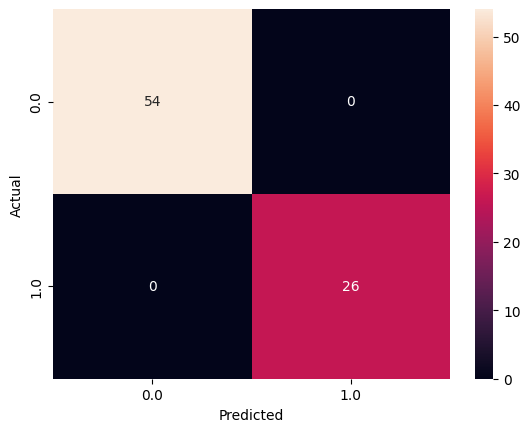

In [95]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)